In [1]:
import keras
print(keras.__version__)

2.9.0


In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# 자주 사용되는 10000개의 데이터를 가져옴

In [3]:
train_data.shape

(25000,)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
word_index = imdb.get_word_index()
word_index
reverse_word_index = dict([value, key] for (key, value)in word_index.items())

In [7]:
decoded_review = ' '.join(reverse_word_index.get(i-3, '?') for i in train_data[0])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
type(reverse_word_index)

dict

In [9]:
# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  
  return results

In [10]:
for i, c in enumerate(['A', 'B', 'C'], start=1):    # enumerate : 인덱스 번호가 같이 붙음(i: 인덱스, c: ABC)
  print(i, c)                                       # start=1 : 인덱스 번호 '1'부터 시작

1 A
2 B
3 C


In [11]:
temp = enumerate(['A', 'B', 'C'])
next(temp)
next(temp)
next(temp)
#list(temp) # enumerate 타입을 list 타입으로 변환 (enumerate는 튜플타입이라 원하는 타입으로 변경해서 사용가능)

(2, 'C')

***   
***

In [12]:
# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):  # train_data 가 sequences로 감
  results = np.zeros((len(sequences),dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

# Data의 Encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [14]:
# float type으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [40]:
# 신경망의 구축
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# optimizer='rmsprop'를 옆에 코드로 변경함(오버피팅, 과하게 학습하는 것을 막기위해서)

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 77ms/step - loss: 0.5319 - accuracy: 0.7887 - val_loss: 0.4010 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3189 - accuracy: 0.9005 - val_loss: 0.3110 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2327 - accuracy: 0.9257 - val_loss: 0.2815 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1837 - accuracy: 0.9404 - val_loss: 0.2720 - val_accuracy: 0.8921
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1487 - accuracy: 0.9533 - val_loss: 0.2833 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1230 - accuracy: 0.9613 - val_loss: 0.2913 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1038 - accuracy: 0.9674 - val_loss: 0.3041 - val_accuracy: 0.8848
Epoch 8/20
30

In [45]:
# 실험 결과 데이터를 가져온다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

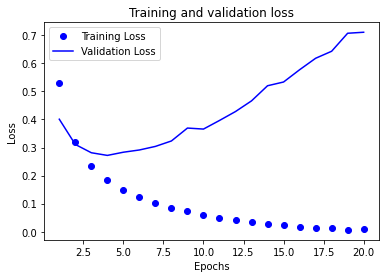

In [46]:
# 실험 결과를 시각화 한다. 
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss,'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

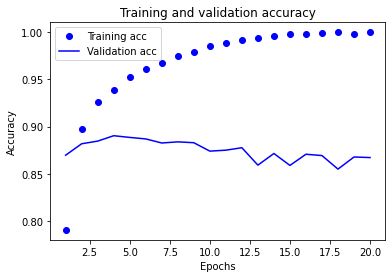

In [35]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [39]:
# 신경망의 구축, model compile 부분 다시 실행하고 돌리기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/3
59/59 [==============================] - 2s 30ms/step - loss: 0.1753 - accuracy: 0.9417 - val_loss: 0.3043 - val_accuracy: 0.8781
Epoch 2/3
59/59 [==============================] - 2s 32ms/step - loss: 0.1317 - accuracy: 0.9557 - val_loss: 0.3249 - val_accuracy: 0.8793
Epoch 3/3
59/59 [==============================] - 2s 32ms/step - loss: 0.1041 - accuracy: 0.9650 - val_loss: 0.3239 - val_accuracy: 0.8811
